In [8]:
import cv2
import matplotlib.pyplot as plt
import numpy as np

## 图片

In [4]:
#加载，显示，保存图像
img = cv2.imread('./image/lenna.jpg')       #加载    
cv2.imshow('lenna',img)                     #显示
key = cv2.waitKey(0)
if key == 27:    #esc
    cv2.destroyAllWindows()
elif key == ord('s'):      #按s键
    cv2.imwrite('./image/lenna1.jpg',img)   #保存
    cv2.destroyAllWindows()                 #删除窗口，可在括号内介入制定窗口名称   

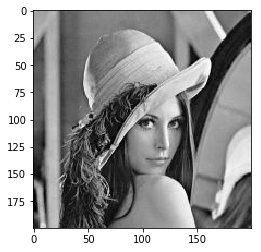

True

In [9]:
img = cv2.imread('./image/lenna.jpg',0)     #gray
plt.imshow(img,cmap='gray')
plt.show()
cv2.imwrite('./image/lenna_gray.jpg',img)   #保存

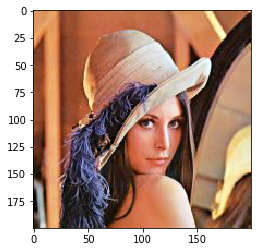

In [6]:
img = cv2.imread('./image/lenna.jpg')     #BGR
img = cv2.cvtColor(img,cv2.COLOR_BGR2RGB)  # BGR -> RGB
plt.imshow(img)    #RGB
plt.show()

## 视频

### 摄像头捕获视频   
cap.isOpened()，来检查是否成功初始化   
cap.read()返回一个布尔值（True/False）。如果帧读取的是正确的，就是True。   
cap.get(propId)来获得视频的一些参数信息。这里propId可以是0到18之间的任何整数。每一个数代表视频的一个属性。  
cap.set(propId,value)来修改，value就是你想要设置成的新值。   


In [4]:
def videoCap(Index):
    #该创建一个VideoCapture对象
    cap = cv2.VideoCapture(Index)  #索引号选择摄像头，0一般是笔记本内置摄像头
    while(True):
        # Capture frame-by-frame
        ret,frame = cap.read()                           #帧读取正确，返回True
        gray = cv2.cvtColor(frame,cv2.COLOR_BGR2GRAY)
        cv2.imshow('frame',gray)
        if cv2.waitKey(0) == ord('q'):
            break        
    # When everything done, release the capture
    cap.release()
    cv2.destroyAllWindows()

### 从文件中播放视频

In [7]:
#该创建一个VideoCapture对象
def videoPlayer(file):
    cap = cv2.VideoCapture(file)                  #读取视频文件
    while(cap.isOpened()):
        # Capture frame-by-frame
        ret,frame = cap.read()                           #帧读取正确，返回True
        #gray = cv2.cvtColor(frame,cv2.COLOR_BGR2GRAY)
        cv2.imshow('frame',frame)
        if cv2.waitKey(25)&0xff == ord('q'):          #cv2.waiKey()设置适当的持续时间,25ms
            break        
    # When everything done, release the capture
    cap.release()
    cv2.destroyAllWindows()
    
videoPlayer('./image/test.mp4')

### 保存视频

In [5]:
#该创建一个VideoCapture对象
def videoSave(file):
    cap = cv2.VideoCapture(file)    #读取视频文件
    
    # Define the codec and create VideoWriter object
    fourcc = cv2.VideoWriter_fourcc(*'XVID')
    out = cv2.VideoWriter('./image/output1.avi',fourcc, 20.0, (640,480)) #指定路径，fourcc代码，每秒帧数，帧大小

    while(cap.isOpened()):
        # Capture frame-by-frame
        ret,frame = cap.read()         #帧读取正确，返回True
        if ret == True:
            frame = cv2.flip(frame,0)   #翻转
            out.write(frame)
            cv2.imshow('frame',frame)            
            if cv2.waitKey(25)&0xff == ord('q'):    #cv2.waiKey()设置适当的持续时间,25ms
                break
        else:
            break
    # When everything done, release the capture
    cap.release()
    out.release()
    cv2.destroyAllWindows()
    
videoSave('./image/test.mp4')

## 绘图函数   
img: 想要绘制的图像   
color:形状的颜色，传入元祖(255,0,0)   
thickness:线条的粗细   
linetype:线条的类型，默认情况是8连接  

cv2.line(), cv2.rectangle(), cv2.circle(), cv2.ellipse(), cv2.putText()   

所有的绘图函数的返回值都是None，所以不能使用img =cv2.line(img,(0,0),(511,511),(255,0,0),5)。

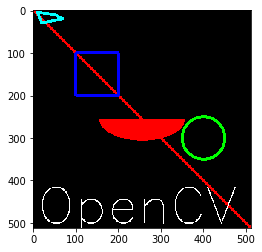

In [7]:
#画线

# Create a black image
img = np.zeros((512,512,3),np.uint8)
# Draw a diagonal blue line with thickness of 5 px
cv2.line(img,(0,0),(511,511),(255,0,0),5)  # img，起点，终点，颜色，线宽
#矩形
cv2.rectangle(img,(100,100),(200,200),(0,0,255),5)  #左上点，右下点
#圆
cv2.circle(img, (400,300),50,(0,255,0),5)  #中心坐标，半径
#椭
cv2.ellipse(img,(256,256),(100,50),0,0,180,(255,0,0),-1)  #中心点，长短轴，沿逆时针选择角度，沿顺时针方向起始角度和结束角度,颜色，-1填充
#多边形
pts=np.array([[10,5],[20,30],[70,20],[50,10]],np.int32) #数据类型必须是int32
pts=pts.reshape((-1,1,2)) 
#这里 reshape 的第一个参数为-1, 表明这一维的长度是根据后面的维度的计算出来的。
#如果第三个参数是 False，我们得到的多边形是不闭合的（首尾不相连）。
cv2.polylines(img,[pts],True,(0,255,255),5) # 图像，点集，是否闭合，颜色，线条粗细

#添加文字
font=cv2.FONT_HERSHEY_SIMPLEX
cv2.putText(img,'OpenCV',(10,500), font, 4,(255,255,255),2)#文字，位置，类型，大小，颜色，粗细

plt.imshow(img)

## 鼠标当画笔

In [8]:
#被支持的鼠标事件
events=[i for i in dir(cv2) if 'EVENT'in i]
print(events)

['EVENT_FLAG_ALTKEY', 'EVENT_FLAG_CTRLKEY', 'EVENT_FLAG_LBUTTON', 'EVENT_FLAG_MBUTTON', 'EVENT_FLAG_RBUTTON', 'EVENT_FLAG_SHIFTKEY', 'EVENT_LBUTTONDBLCLK', 'EVENT_LBUTTONDOWN', 'EVENT_LBUTTONUP', 'EVENT_MBUTTONDBLCLK', 'EVENT_MBUTTONDOWN', 'EVENT_MBUTTONUP', 'EVENT_MOUSEHWHEEL', 'EVENT_MOUSEMOVE', 'EVENT_MOUSEWHEEL', 'EVENT_RBUTTONDBLCLK', 'EVENT_RBUTTONDOWN', 'EVENT_RBUTTONUP']


In [10]:
#双击画圆

def draw_circle(event,x,y,flags,param):
    if event==cv2.EVENT_LBUTTONDBLCLK:  #双击
        cv2.circle(img,(x,y),100,(255,0,0),-1)
        
# 创建图像与窗口并将窗口与回调函数绑定
img=np.zeros((512,512,3),np.uint8)
cv2.namedWindow('image')
cv2.setMouseCallback('image',draw_circle)   #鼠标回调函数

while(1):
    cv2.imshow('image',img)
    if cv2.waitKey(20)&0xFF==27:
        break
cv2.destroyAllWindows()

In [7]:
#鼠标拖动

drawing = False    #鼠标按下时变为True
mode = True        #true绘制矩形，按下m绘制曲线

ix,iy = -1,-1
def nothing(x):
    pass

#创建回调函数
def draw_circle(event,x,y,flags,param):
    
    r=cv2.getTrackbarPos('R','image')  #第5节内容
    g=cv2.getTrackbarPos('G','image')
    b=cv2.getTrackbarPos('B','image')
    color=(b,g,r)
    
    global ix,iy,drawing,mode
    
    # 当按下左键是返回起始位置坐标
    if event==cv2.EVENT_LBUTTONDOWN:
        drawing = True
        ix,iy = x,y
    # 当鼠标左键按下并移动是绘制图形。event 可以查看移动，flag 查看是否按下
    elif event==cv2.EVENT_MOUSEMOVE and flags==cv2.EVENT_FLAG_LBUTTON:
        if drawing == True:
            if mode == True:
                cv2.rectangle(img,(ix,iy),(x,y),color,-1)
            else:
                # 绘制圆圈，小圆点连在一起就成了线，3 代表了笔画的粗细
                cv2.circle(img,(x,y),3,color,-1)
        
    elif event == cv2.EVENT_LBUTTONUP:
        drawing = False

img=np.zeros((512,512,3),np.uint8)
cv2.namedWindow('image')

cv2.createTrackbar('R','image',0,255,nothing)  #滑动条名，窗口名，初值，最大值，回调函数
cv2.createTrackbar('G','image',0,255,nothing)
cv2.createTrackbar('B','image',0,255,nothing)

cv2.setMouseCallback('image',draw_circle)
while(1):
    cv2.imshow('image',img)
    k=cv2.waitKey(2)&0xFF
    if k==ord('m'):
        mode=not mode
    elif k==ord('q'):
        break
cv2.destroyAllWindows()

## 滑动条做调色板    
createTrackbar()    
getTrackbarPos()

In [3]:
def nothing(x):
    pass

img = np.zeros((300,512,3),np.uint8)
cv2.namedWindow('image')

cv2.createTrackbar('R','image',0,255,nothing)  #滑动条名，窗口名，初值，最大值，回调函数
cv2.createTrackbar('G','image',0,255,nothing)
cv2.createTrackbar('B','image',0,255,nothing)

switch = '0:OFF\n1:ON'
cv2.createTrackbar(switch,'image',0,1,nothing)
while(1):
    cv2.imshow('image',img)
    k=cv2.waitKey(1)&0xFF
    if k==27:
        break
        
    r=cv2.getTrackbarPos('R','image')  #滑动条名，窗口名，滑动条默认位置，最大值，回调函数
    g=cv2.getTrackbarPos('G','image')
    b=cv2.getTrackbarPos('B','image')
    s=cv2.getTrackbarPos(switch,'image')
    
    if s==0:
        img[:]=0
    else:
        img[:]=[b,g,r]
cv2.destroyAllWindows()